In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('train_Data.csv')
train_df.head(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10 00:00:00,2016-01-15 00:00:00,2012-02-10 00:00:00,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31 00:00:00,2016-02-15 00:00:00,2012-03-31 00:00:00,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17 00:00:00,2023-02-10 00:00:00,2017-06-17 00:00:00,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29 00:00:00,2017-11-10 00:00:00,2013-11-29 00:00:00,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08 00:00:00,2015-07-05 00:00:00,2011-12-08 00:00:00,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,2011-12-19 00:00:00,2015-12-15 00:00:00,2011-12-19 00:00:00,3413012,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,2011-12-31 00:00:00,2015-12-05 00:00:00,2011-12-31 00:00:00,3553579,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
7,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,360000.0,11000.0,2012-02-09 00:00:00,2016-02-15 00:00:00,2012-02-09 00:00:00,4008234,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service
8,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,400000.0,50000.0,2012-03-29 00:00:00,2016-01-15 00:00:00,2012-03-29 00:00:00,4603217,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service
9,13,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,490000.0,10000.0,2012-03-30 00:00:00,2016-02-15 00:00:00,2012-03-30 00:00:00,4619836,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,No Top-up Service


In [3]:
test_df=pd.read_excel("test_Data.xlsx")
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,419616.0,14723.0,2012-02-29,2015-02-10,2012-02-29,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,280000.0,25350.0,2013-07-25,2014-08-10,2013-07-26,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [4]:
#train_df['train']=1
#test_df['test']=0
#df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True).copy()
#df.head(10)

In [5]:
train_df.shape

(128655, 26)

In [6]:
#df['train'].fillna(0,inplace=True)
#df['test'].fillna(0,inplace=True)

In [7]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [8]:
train_df.drop(['Area','City','MaturityDAte','AuthDate','DisbursalDate'],axis=1,inplace=True)
test_df.drop(['Area','City','MaturityDAte','AuthDate','DisbursalDate'],axis=1,inplace=True)

In [9]:
train_df=train_df.dropna()
test_df['ManufacturerID'].fillna(test_df['ManufacturerID'].mode()[0],inplace=True)
test_df['SEX'].fillna(test_df['SEX'].mode()[0],inplace=True)
test_df['AGE'].fillna(test_df['AGE'].mean(),inplace=True)
test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].median(),inplace=True)
test_df['ZiPCODE'].fillna(test_df['ZiPCODE'].mode()[0],inplace=True)

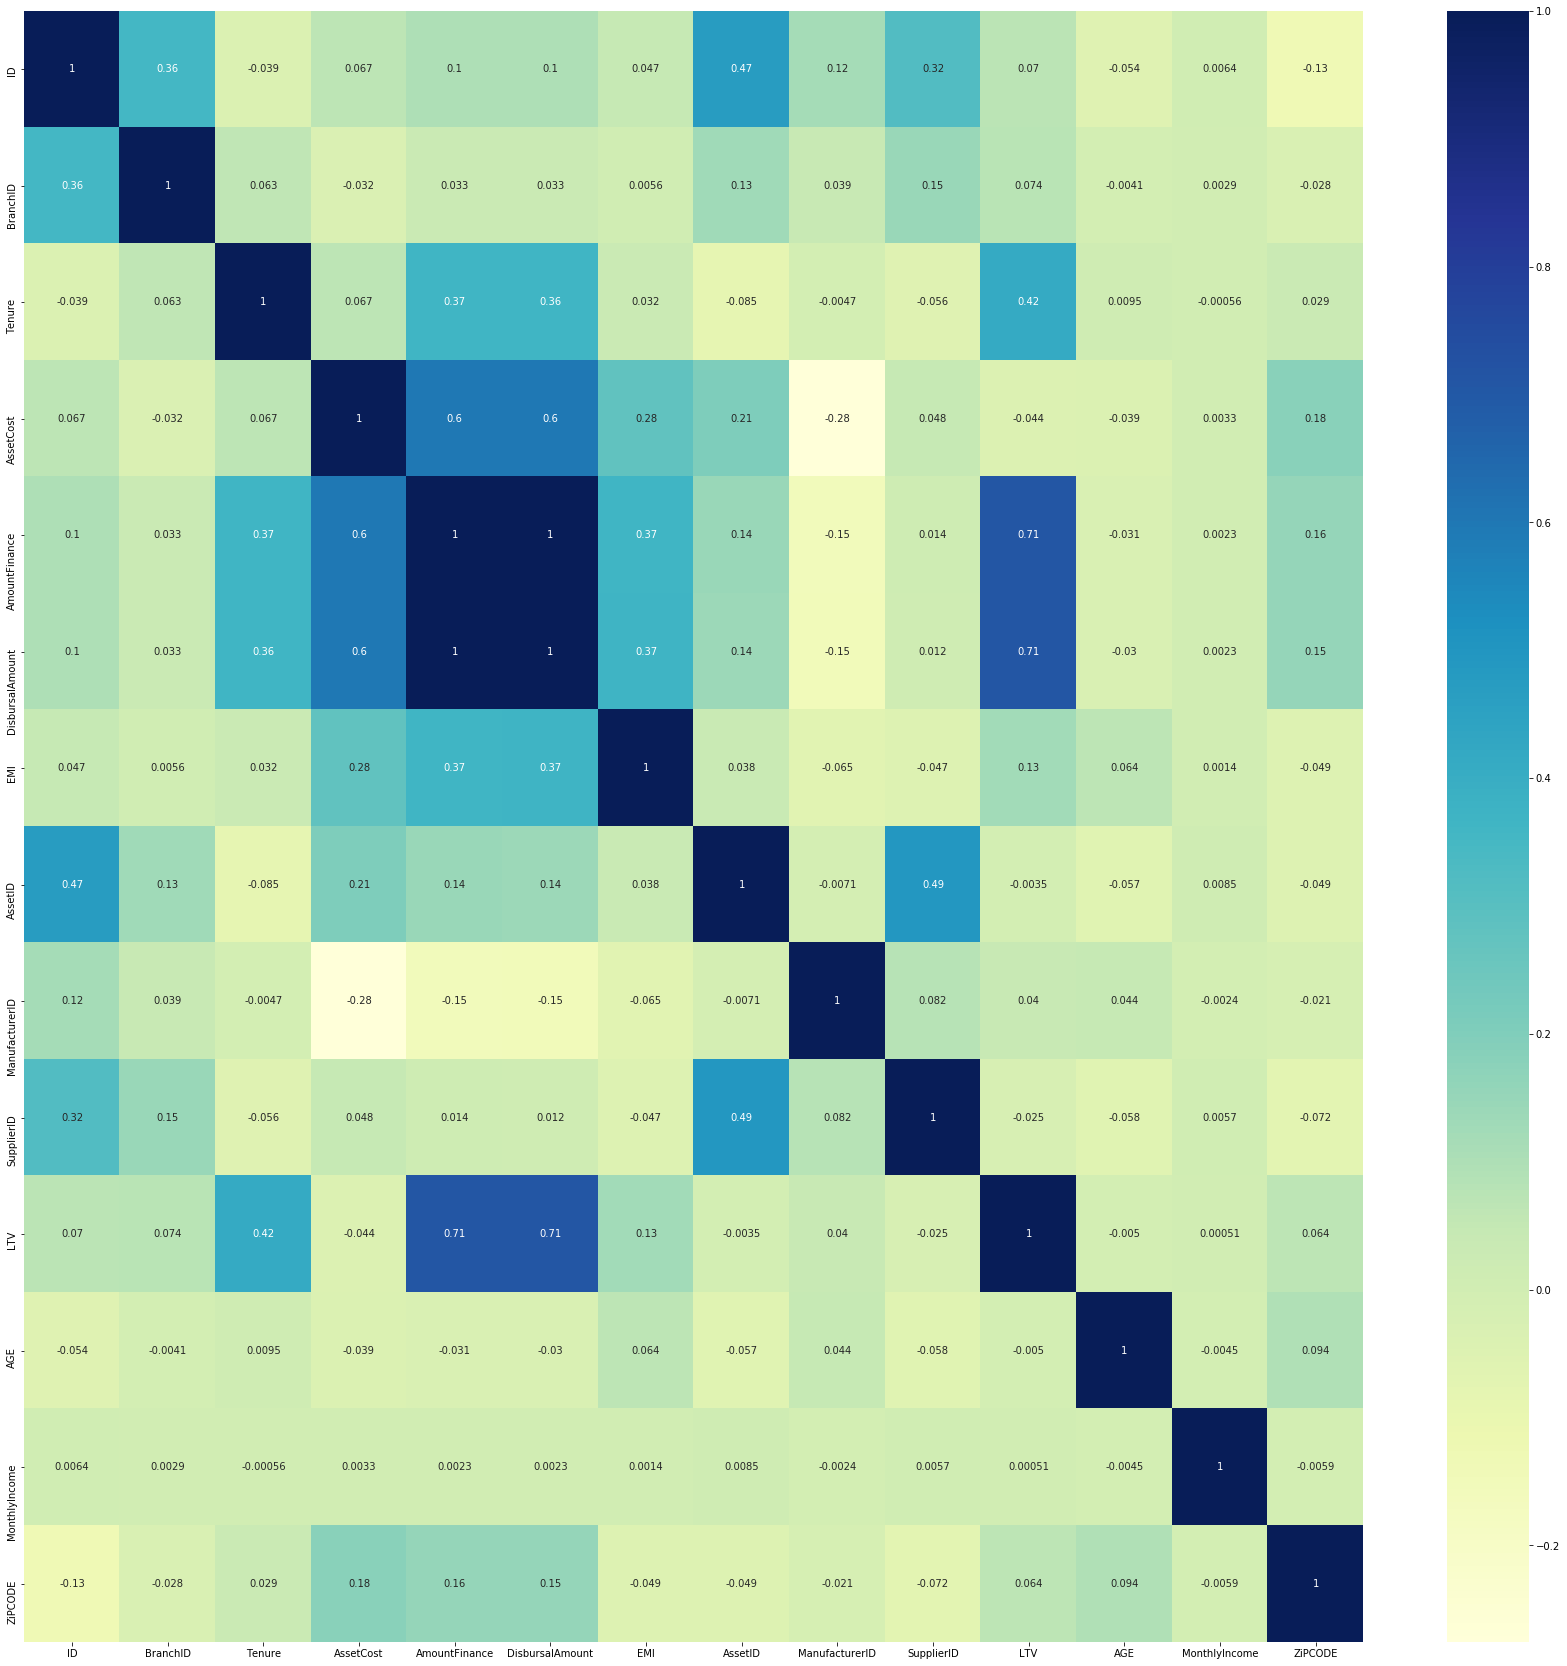

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

From the above we can see that the AccountFinance and DisbursedAmount is highly correlated with eachother, so we need to drop one of the features, and asset cost is also highly correlated as amount should be near equal to asset.

In [11]:
train_df.drop(['AmountFinance'],axis=1,inplace=True)
test_df.drop(['AmountFinance'],axis=1,inplace=True)

In [12]:
train_df['Top-up Month'].value_counts()

No Top-up Service    106123
 > 48 Months           8324
36-48 Months           3647
24-30 Months           3491
30-36 Months           3059
18-24 Months           2366
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_col_mask=['Frequency','InstlmentMode','LoanStatus','PaymentMode','State','SEX']
label=['Top-up Month']
le=LabelEncoder()
for col in cat_col_mask:
    le.fit(train_df[col].unique().tolist() + test_df[col].unique().tolist())
    train_df[col]=le.transform(train_df[col])
    test_df[col]=le.transform(test_df[col])
train_df[label]=le.fit_transform(train_df[label])

In [14]:
train_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5


### Creating Features from Feature Engineering

In [15]:
train_df1=pd.read_csv("train_bureau.csv")
train_df1.head(10)

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,2018-02-27 00:00:00,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,NaN,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,NaN,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
5,1,False,PRIMARY,Credit Card,NAB,2018-04-30 00:00:00,Individual,Closed,2018-01-11 00:00:00,2018-03-13 00:00:00,NaN,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,"20180331,20180228,20180131,",000000000,"24650,17300,0,",",,,",",,,,",NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000000000000000000000000000,"443769,448365,453134,457687,462320,466802,4712...",",,,,,,,,,,,,,,",",,,,,,,,,,,,,,",84.0
7,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-01-30 00:00:00,2017-09-21 00:00:00,NaN,NaN,"5,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0000000000000870540270270000320000000000...,"0,,0,0,0,0,0,0,0,13060,13060,25982,38767,51417...","0,,0,0,0,0,3064,3064,3064,2972,0,2802,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
8,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-07-31 00:00:00,Individual,Closed,2013-06-11 00:00:00,2017-07-01 00:00:00,NaN,NaN,"4,00,000",NaN,0,NaN,0,0.0,NaN,"20170731,20170601,20170531,20170430,20170331,2...",000DDD0220210220190220220000270000000000000000...,"0,,0,10487,20862,31126,41281,51328,51328,71101...","0,,1722,1722,1722,1722,1722,1722,0,1625,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
9,2,False,PRIMARY,Overdraft,PRB,2017-03-31 00:00:00,Individual,Closed,2016-01-15 00:00:00,2017-03-27 00:00:00,2017-03-27 00:00:00,NaN,"17,00,000",NaN,0,NaN,0,0.0,NaN,"20170331,20170201,20170101,20161231,20161101,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,1699997,,,154997,,,-3,,,149997,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [16]:
import datetime
def preprocess(df):
    df.dropna(subset=['DISBURSED-DT','REPORTED DATE - HIST'], how='all',inplace=True)
    df.sort_values(['DISBURSED-DT'],inplace=True)
    df['diff']=df.groupby('ID')['DISBURSED-DT'].diff().fillna(pd.Timedelta(seconds=0))
    df['diff_months']=df['diff'].astype('timedelta64[M]')
    bins=[0,12,18,24,30,36,48,100]
    groups=df.groupby(['ID',pd.cut(df.diff_months,bins)])
    stacked=groups.size().unstack()
    df['DISBURSED-AMT/HIGH CREDIT'].fillna('0',inplace=True)
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].str.replace(',','')
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].astype('int')
    df['CURRENT-BAL'].fillna('0',inplace=True)
    df['CURRENT-BAL']=df['CURRENT-BAL'].str.replace(',','')
    df['CURRENT-BAL']=df['CURRENT-BAL'].astype('int')
    total3=df.groupby('ID').agg({'DISBURSED-AMT/HIGH CREDIT':['sum'],'DISBURSED-DT':['count'], 'CURRENT-BAL': 'sum'}).reset_index()
    total3.columns = total3.columns.droplevel(1)
    total3.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'Totalloanamount','DISBURSED-DT':'Totalloancount','CURRENT-BAL':'Totaloverdue'}, inplace=True)
    total1=df.groupby(by='ID',as_index=False)['DISBURSED-AMT/HIGH CREDIT','CURRENT-BAL','diff_months'].mean()
    total1.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'AvgCredit','CURRENT-BAL':'AvgOverdue','diff_months':'Avgdisbursal'},inplace=True)
    total1=total1.merge(total3, on='ID', how='inner')
    total2=total1.merge(stacked, on='ID', how='inner')
    return total2

In [17]:
train_df1['DISBURSED-DT']=train_df1['DISBURSED-DT'].str.split(" ").str[0]
train_df1['DISBURSED-DT'].fillna(train_df1['REPORTED DATE - HIST'].str.rsplit(',').str[-2],inplace=True)
train_df1['DISBURSED-DT']=pd.to_datetime(train_df1['DISBURSED-DT'],errors='coerce')
train_df2=preprocess(train_df1)
train_df2.head(10)

,ID,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,1,2.445947e+05,68725.111111,9.666667,2201352,9,618526,6,0,1,1,0,0,0
1,2,1.393622e+06,796112.076923,6.538462,18117081,13,10349457,6,1,1,0,0,0,0
2,3,1.196248e+05,66618.225806,4.290323,3708369,31,2065165,19,2,0,1,1,0,0
3,7,3.181382e+05,156000.000000,14.750000,1272553,4,624000,2,0,0,0,0,0,1
4,8,2.893166e+05,139159.857143,12.285714,2025216,7,974119,1,1,0,1,1,0,0
5,9,2.800000e+05,0.000000,0.000000,280000,1,0,0,0,0,0,0,0,0
6,10,3.880893e+05,94574.333333,25.666667,1164268,3,283723,0,0,1,0,0,0,1
7,11,4.342814e+05,157069.600000,4.560000,10857036,25,3926740,14,3,0,0,0,0,0
8,12,4.000000e+05,0.000000,0.000000,400000,1,0,0,0,0,0,0,0,0
9,13,5.075000e+05,0.000000,12.500000,1015000,2,0,0,0,0,1,0,0,0


In [18]:
train_df12=train_df.merge(train_df2, on='ID', how='inner')
train_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0,2.445947e+05,68725.111111,9.666667,2201352,9,618526,6,0,1,1,0,0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6,1.393622e+06,796112.076923,6.538462,18117081,13,10349457,6,1,1,0,0,0,0
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1,1.196248e+05,66618.225806,4.290323,3708369,31,2065165,19,2,0,1,1,0,0
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0,3.181382e+05,156000.000000,14.750000,1272553,4,624000,2,0,0,0,0,0,1
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5,2.893166e+05,139159.857143,12.285714,2025216,7,974119,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128039,143390,1,1,1,3,424,24,470000,265601.0,76800.0,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,3,1.043800e+06,933815.000000,5.500000,2087601,2,1867630,1,0,0,0,0,0,0
128040,143391,1,1,1,3,424,24,460000,275630.0,80100.0,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,6,2.756300e+05,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0
128041,143393,2,1,0,3,424,23,545000,300733.0,15277.0,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,6,1.761380e+05,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0
128042,143394,1,1,0,3,424,35,350000,250962.0,74341.0,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,6,2.506430e+05,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0


In [19]:
train_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
Top-up Month       0
AvgCredit          0
AvgOverdue         0
Avgdisbursal       0
Totalloanamount    0
Totalloancount     0
Totaloverdue       0
(0, 12]            0
(12, 18]           0
(18, 24]           0
(24, 30]           0
(30, 36]           0
(36, 48]           0
(48, 100]          0
dtype: int64

In [20]:
test_df1=pd.read_excel('test_bureau.xlsx')
test_df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,NaT,"10,000",588,NaN,589,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,2019-10-15,NaN,"25,00,000","30,797/Monthly","21,07,227",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,2019-10-15,NaN,"99,000","1,223/Monthly","83,458",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,NaT,NaN,"3,65,000",NaN,0,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,2017-06-15,NaN,"25,801",NaN,0,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64014,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"12,30,000",NaN,"2,04,173",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"204173,243754,282926,321694,360063,398035,4356...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","42120,42120,42120,42120,42120,42120,42120,4212...",NaN
64015,143400,False,PRIMARY,Commercial Vehicle Loan,PRB,2018-02-28,Joint,Closed,2015-05-16,2018-02-24 00:00:00,2018-02-24,NaN,"20,00,000",NaN,0,NaN,0,0.0,Standard,"20180228,20180131,20171231,20171130,20171031,2...",0000000000000000000000000000000000000000000000...,"0,0,0,0,0,0,0,0,0,0,0,100494,200014,298570,396...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1796,0,0,0,0,0,0,0,0,0,101475,101475,101475,10...",NaN
64016,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"10,80,000",NaN,"1,79,276",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"179276,214030,248425,282466,316155,349498,3824...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","36984,36984,36984,36984,36984,36984,36984,3698...",NaN
64017,143400,True,PRIMARY,Tractor Loan,NBF,2014-08-31,Individual,Closed,2013-05-28,2014-08-31 00:00:00,NaT,NaN,"3,10,000",NaN,0,NaN,0,0.0,NaN,"20140831,20140731,20140630,20140531,20140430,2...",000000000000000000000000000000000000000000000000,"0,0,0,27840,55324,82457,109244,135689,161796,1...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",",,,,,,,,,,,,,,,,,",NaN


In [21]:
test_df1.isnull().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                    0
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                    44
CLOSE-DT                     31453
LAST-PAYMENT-DATE            32550
CREDIT-LIMIT/SANC AMT        62421
DISBURSED-AMT/HIGH CREDIT       38
INSTALLMENT-AMT              47693
CURRENT-BAL                     32
INSTALLMENT-FREQUENCY        48243
OVERDUE-AMT                  13127
WRITE-OFF-AMT                 2561
ASSET_CLASS                  34902
REPORTED DATE - HIST          2561
DPD - HIST                    2565
CUR BAL - HIST                2561
AMT OVERDUE - HIST            2561
AMT PAID - HIST               2672
TENURE                       42882
dtype: int64

In [22]:
test_df2=preprocess(test_df1)
test_df2

,ID,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,4,7.411470e+05,5.478185e+05,22.750000,2964588,4,2191274,0,0,0,1,0,0,1
1,5,2.424766e+05,1.134039e+05,9.375000,1939813,8,907231,5,0,1,0,1,0,0
2,6,2.697801e+05,8.566667e+03,8.583333,3237361,12,102800,4,2,1,1,0,0,0
3,25,4.000000e+05,6.379650e+04,7.500000,800000,2,127593,0,1,0,0,0,0,0
4,119,4.650000e+05,5.810000e+04,23.000000,930000,2,116200,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,1.292226e+06,3.140004e+05,2.974359,50396799,39,12246016,10,2,0,0,1,0,0
14741,143397,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,0,2,0,0,0,1
14742,143398,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,0,2,0,0,0,1
14743,143399,8.232919e+05,4.599900e+04,5.312500,13172671,16,735984,5,1,0,0,1,0,0


In [23]:
test_df12=test_df.merge(test_df2, on='ID', how='inner')
test_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,4,2,0,1,9,2,46,480000,365000.0,1000.0,3524747,1046.0,22354,75.83,1,50.00000,32069.00,12,473001.0,7.411470e+05,5.478185e+05,22.750000,2964588,4,2191274,0,0,0,1,0,0,1
1,5,2,0,1,7,2,45,480000,285000.0,9300.0,4985862,1046.0,22354,57.44,1,35.00000,25000.00,12,473001.0,2.424766e+05,1.134039e+05,9.375000,1939813,8,907231,5,0,1,0,1,0,0
2,6,3,1,1,7,2,48,580000,400000.0,35800.0,12881783,1060.0,65929,68.97,1,37.00000,23333.33,12,473001.0,2.697801e+05,8.566667e+03,8.583333,3237361,12,102800,4,2,1,1,0,0,0
3,25,1,1,1,1,154,36,725000,500000.0,52000.0,10613776,1049.0,68597,61.79,1,55.00000,91666.67,4,493558.0,4.000000e+05,6.379650e+04,7.500000,800000,2,127593,0,1,0,0,0,0,0
4,119,3,1,1,7,194,48,617000,400000.0,35400.0,7911110,1049.0,38493,59.09,1,48.00000,12500.00,14,754137.0,4.650000e+05,5.810000e+04,23.000000,930000,2,116200,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,2,1,1,7,143,35,530016,419616.0,14723.0,4276747,1046.0,22094,79.17,1,40.23436,33333.33,8,122001.0,1.292226e+06,3.140004e+05,2.974359,50396799,39,12246016,10,2,0,0,1,0,0
14741,143397,2,1,1,7,32,36,595000,446500.0,15491.0,4746586,2721.0,61196,75.04,1,40.23436,33333.33,11,560020.0,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,0,2,0,0,0,1
14742,143398,2,1,1,7,32,36,595000,446500.0,15491.0,4746588,2721.0,61196,75.04,1,40.23436,33333.33,11,560020.0,8.443833e+06,6.406842e+06,23.333333,50663000,6,38441054,1,0,2,0,0,0,1
14743,143399,2,1,1,9,246,12,400000,280000.0,25350.0,11719081,1046.0,63565,70.00,1,40.23436,33333.33,16,335001.0,8.232919e+05,4.599900e+04,5.312500,13172671,16,735984,5,1,0,0,1,0,0


In [24]:
test_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
AvgCredit          0
AvgOverdue         0
Avgdisbursal       0
Totalloanamount    0
Totalloancount     0
Totaloverdue       0
(0, 12]            0
(12, 18]           0
(18, 24]           0
(24, 30]           0
(30, 36]           0
(36, 48]           0
(48, 100]          0
dtype: int64

In [25]:
x=train_df12.drop(['Top-up Month','ID'],axis=1)
x

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,Avgdisbursal,Totalloanamount,Totalloancount,Totaloverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,2.445947e+05,68725.111111,9.666667,2201352,9,618526,6,0,1,1,0,0,0
1,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,1.393622e+06,796112.076923,6.538462,18117081,13,10349457,6,1,1,0,0,0,0
2,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1.196248e+05,66618.225806,4.290323,3708369,31,2065165,19,2,0,1,1,0,0
3,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,3.181382e+05,156000.000000,14.750000,1272553,4,624000,2,0,0,0,0,0,1
4,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,2.893166e+05,139159.857143,12.285714,2025216,7,974119,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128039,1,1,1,3,424,24,470000,265601.0,76800.0,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,1.043800e+06,933815.000000,5.500000,2087601,2,1867630,1,0,0,0,0,0,0
128040,1,1,1,3,424,24,460000,275630.0,80100.0,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,2.756300e+05,73890.000000,0.000000,275630,1,73890,0,0,0,0,0,0,0
128041,2,1,0,3,424,23,545000,300733.0,15277.0,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,1.761380e+05,38533.250000,5.500000,704552,4,154133,3,0,0,0,0,0,0
128042,1,1,0,3,424,35,350000,250962.0,74341.0,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,2.506430e+05,132487.000000,0.000000,250643,1,132487,0,0,0,0,0,0,0


In [26]:
y=train_df12['Top-up Month']
y

0         0
1         6
2         1
3         0
4         5
         ..
128039    3
128040    6
128041    6
128042    6
128043    6
Name: Top-up Month, Length: 128044, dtype: int32

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45,shuffle=True,stratify=y)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((89630, 31), (38414, 31), (89630,), (38414,))

In [30]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = []
precision = []
recall = []
f1_score = []

def calculate_metrics(y_test,y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred,pos_label='positive',average='macro')
    
    accuracy.append(acc)
    f1_score.append(f1)
    
kfold_mean=[]
kfold_max=[]

def calculate_kfold(estimator):
    accuracies = cross_val_score(estimator,x,y, cv=10)
    kfold_mean.append(accuracies.mean())
    kfold_max.append(accuracies.max())

In [31]:
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
lgbmpred=lgbm.predict(x_test)
calculate_metrics(y_test, lgbmpred)
calculate_kfold(lgbm)

In [32]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)
xgbcpred=xgbc.predict(x_test)
calculate_metrics(y_test, xgbcpred)
calculate_kfold(xgbc)

In [ ]:
from catboost import CatBoostClassifier
catbost=CatBoostClassifier()
catbost.fit(x_train,y_train)
catboostpred=catbost.predict(x_test)
calculate_metrics(y_test, catboostpred)
calculate_kfold(catbost)

In [42]:
results = pd.DataFrame(data = {'accuracy':accuracy,'f1_score': f1_score,'kfold_mean': kfold_mean,'kfold_max': kfold_max}, 
             index = ['LightGBM','xgboost','SVCLGBM'] )
results

,accuracy,f1_score,kfold_mean,kfold_max
LightGBM,0.838132,0.314541,0.618307,0.792659
xgboost,0.840371,0.309622,0.645033,0.793050
SVCLGBM,0.801817,0.168526,0.793407,0.824664


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth' : [1,5,10,15],
          'boosting_type' : ['gbdt'],
          'subsample' : [0.1,0.4,0.7,0.9,1],
          'num_leaves': [24,64,84,100],
          'colsample_bytree' : [0.2,0.4,0.6],
          'random_state' : [1,45,55,80,100],
          'importance_type' : ['gain'],
          'reg_alpha' : [0,2,4],
          'reg_lambda' : [0,2,4],
          'learning_rate': [0.05,0.2,0.1,0.3],
          'n_estimators': [100,200,300,500,1000],
         }
hypelib=RandomizedSearchCV(LGBMClassifier(),params, scoring='f1_macro')

In [ ]:
hypelib.fit(x_train,y_train)

In [ ]:
hypelib.best_params_, hypelib.best_score_

In [ ]:
hyplgbmpred=hypelib.predict(x_test)
calculate_metrics(y_test, hyplgbmpred)
#calculate_kfold(hypelib)

In [ ]:
results = pd.DataFrame(data = {'accuracy':accuracy,'f1_score': f1_score}, 
             index = ['LightGBM','xgboost','catboost','HyperLightGBM'] )
results

In [ ]:
test_df123=test_df12.drop(['ID'],axis=1)
predict=le.inverse_transform(hypelib.predict(test_df123))

In [ ]:
test_df12['Top-up Month']=predict

In [ ]:
df_out=test_df12[['ID','Top-up Month']]
df_out.to_csv('prediction1.csv',index=False)